In [57]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [58]:
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
output_dir = f"{data_path}/clustering/"

data = pd.read_csv(f"{data_path}/phenograph_output/{file}", index_col=0)

# rename cells to be consistent
ct_order = ['Cl Mo','Int Mo', 'Non-Cl Mo', 'DC',  'Neutrophil', 'T other', 'Tc', 'Th', 'Treg', 'Unknown']

# Harmonize cell type names and get rid of spaces
data['source_cluster'] = data['source_cluster'].replace({'T other':'T_other','Non-Cl Mo':'Non-Cl_Mo','Int Mo':'Int_Mo','Cl Mo':'Cl_Mo','Cl MAC':'Cl_Mac','Alt MAC':'Alt_Mac', 'NK cell':'NK','DCs cell':'DC','Neutrophils':'Neutrophil','B cell': 'B', 'Endothelial cell': 'Endothelial', 'Mast cell':'Mast'})
data.rename(columns={'T.other':'T_other','Non.Cl.Mo':'Non-Cl_Mo','Int.Mo':'Int_Mo','Cl.Mo':'Cl_Mo','Cl.MAC':'Cl_Mac','Alt.Mac':'Alt_Mac', 'DCs.cell':'DC', 'Mast.cell':'Mast', 'Endothelial.cell': 'Endothelial', 'B.cell': 'B', 'NK.cell': 'NK', 'Neutrophils':'Neutrophil'}, inplace=True)
data.to_csv(f"{data_path}/clustering/full_cd_275c_renamed.csv", index = False)
# df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv", index = False)

df = data.iloc[:,3:]


In [72]:
data = pd.read_csv(f"{data_path}/clustering/full_cd_clus_21_40_49.csv").drop(columns={"cluster", "agglomerateto_21", "agglomerateto_49", "surv_5y"})
data_all = data
data = data[data['agglomerateto_40'].isin([26,27])].drop(columns={"agglomerateto_40"})

pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx').rename(columns = {'Key':'Patient_ID', 'Survival or loss to follow-up (years)':'survival'})[['Patient_ID', 'survival']]

data  = pd.merge(data, pi, on='Patient_ID', how='inner')
data_all  = pd.merge(data_all, pi, on='Patient_ID', how='inner')

df = data.iloc[:,3:]

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,Int_Mo,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown
0,0.166667,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333
2,0.000000,0.166667,0.000000,0.166667,0.333333,0.0,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000
3,0.000000,0.076923,0.000000,0.153846,0.076923,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.0,0.076923,0.153846,0.153846,0.000000,0.153846
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430739,0.000000,0.000000,0.000000,0.285714,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.142857,0.285714
430740,0.333333,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.166667,0.000000,0.166667
430741,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.125000,0.000000,0.125000
430742,0.000000,0.000000,0.000000,0.375000,0.000000,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.375000,0.000000,0.125000


In [60]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

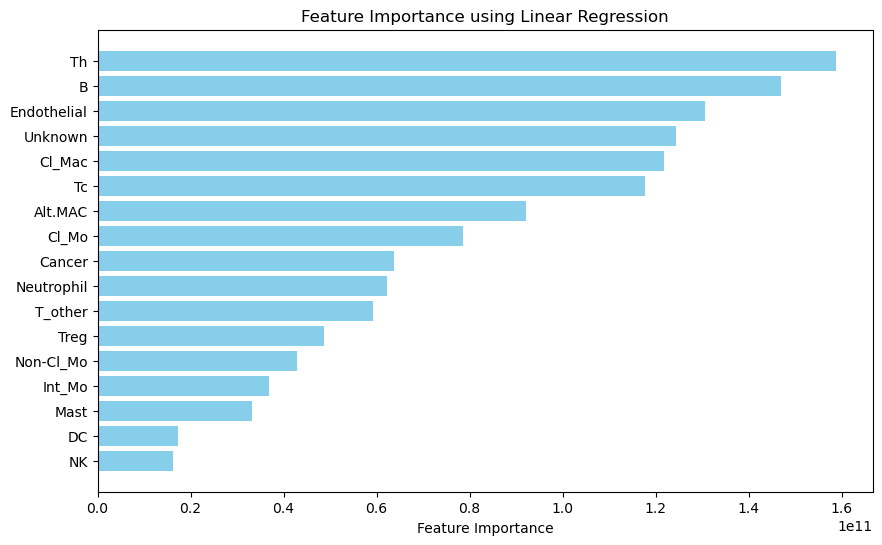

In [62]:
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Linear Regression')
plt.gca().invert_yaxis()
plt.show()


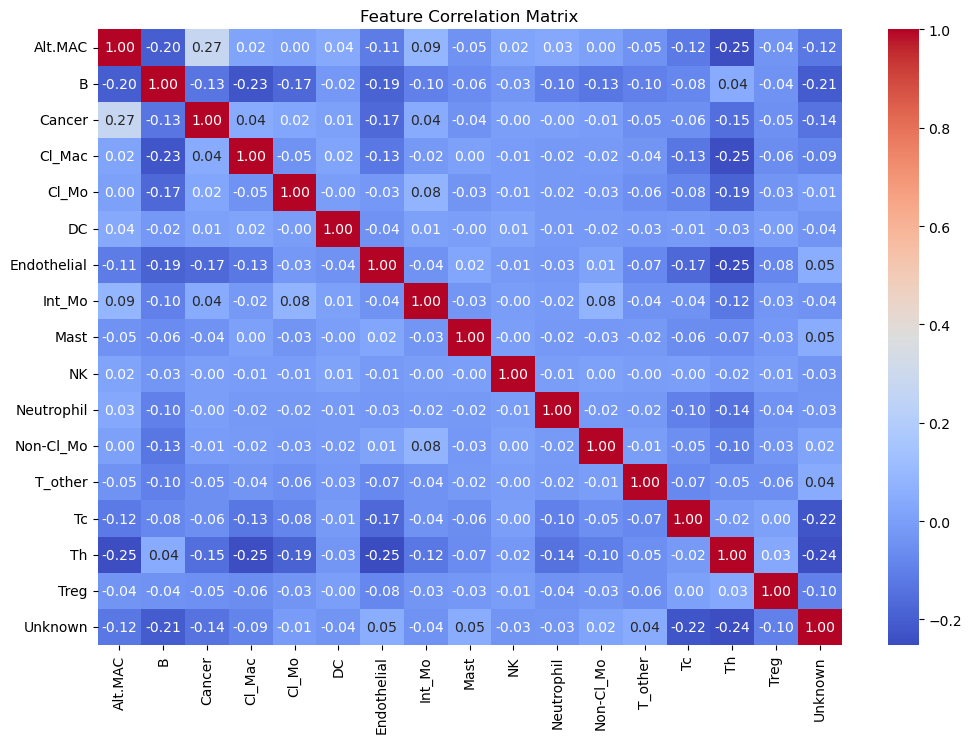

In [63]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [67]:
data_all

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown,agglomerateto_40
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,27
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,34
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,5
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,7
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,39
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,3
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,31
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,27


In [74]:

# df = data_all.iloc[:,3:-1]

X = data_all.iloc[:,3:-2]
y = data_all.iloc[:,-1]
X

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [75]:
data_all

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown,agglomerateto_40,survival
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,27,8.386
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,34,8.386
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,5,8.386
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,7,8.386
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,27,8.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,39,9.386
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,3,9.386
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,31,9.386
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,27,9.386


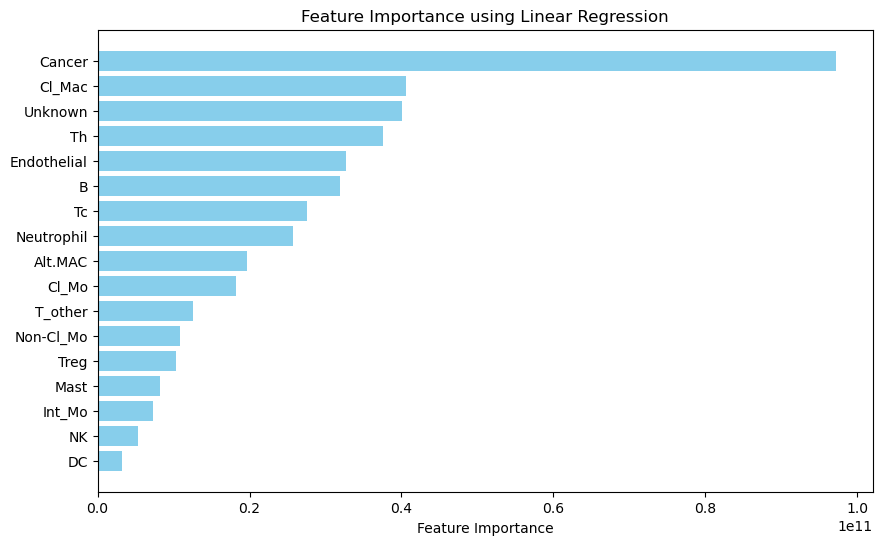

In [76]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Linear Regression')
plt.gca().invert_yaxis()
plt.show()


In [4]:
# colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#000000']
# cts = ['Alt MAC', 'B cell', 'Cancer', 'Cl MAC', 'Cl Mo', 'DCs cell', 'Endothelial cell', 'Int Mo', 'Mast cell', 'NK cell', 'Neutrophils','Non-Cl Mo', 'T other', 'Tc', 'Th', 'Treg', 'Unknown'][::-1]
ct_order = ['Cancer', 'Endothelial',   'Alt_Mac', 'Cl_Mac', 'Cl_Mo','Int_Mo', 'Non-Cl_Mo', 'DC',  'Neutrophil','Mast', 'NK', 'B', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'maroon', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'brown', 'navy', 'aqua', 'teal']
cell_type_colors = {
    'Cancer': '#FF0000',             # Red
    'Alt_Mac': '#0000FF',            # blue 
    'Cl_Mac': '#4169E1',             # blue
    'Cl_Mo': '#0096FF',              # blue
    'Int_Mo': '#00FFFF',             # ''
    'Non-Cl_Mo': '#87CEEB',          # ''
    'Mast': '#FFFF00',          # Yellow
    'B': '#C4A484',             # brown
    'DC': '#6A0DAD',           # purple
    'Endothelial': '#FFA500',   # Orange
    'NK': '#FFC0CB',            # pink
    'Neutrophil': '#FF00FF',        # magenta
    'T_other': '#66CDAA',            # green
    'Tc': '#008000',                 # Green
    'Th': '#2E8B57',                 # Green (similar to 'Tc')
    'Treg': '#3CB371',               # Green
    'Unknown': '#808080'             # Gray
}